# Plots timeseries

2019-12-11 09:35:12 

Fig 1: NNI timeseries of temperature and salinity, including ARGO sal and OISST temp  
Fig 12: NNI timeseries, with IPO, ITF strength


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plots-timeseries" data-toc-modified-id="Plots-timeseries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plots timeseries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span><ul class="toc-item"><li><span><a href="#NNI" data-toc-modified-id="NNI-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NNI</a></span><ul class="toc-item"><li><span><a href="#ORCA" data-toc-modified-id="ORCA-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>ORCA</a></span></li><li><span><a href="#ARGO" data-toc-modified-id="ARGO-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>ARGO</a></span></li></ul></li><li><span><a href="#OISST" data-toc-modified-id="OISST-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>OISST</a></span><ul class="toc-item"><li><span><a href="#Some-correlation-for-validation" data-toc-modified-id="Some-correlation-for-validation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Some correlation for validation</a></span></li></ul></li><li><span><a href="#ITF" data-toc-modified-id="ITF-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ITF</a></span></li><li><span><a href="#Climate-Indices" data-toc-modified-id="Climate-Indices-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Climate Indices</a></span></li></ul></li><li><span><a href="#Detect-events" data-toc-modified-id="Detect-events-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Detect events</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Figure-3:-NNI-temp-&amp;-sal" data-toc-modified-id="Figure-3:-NNI-temp-&amp;-sal-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Figure 3: NNI temp &amp; sal</a></span></li><li><span><a href="#Fig-11:-NNI-plus-ONI,-ITF" data-toc-modified-id="Fig-11:-NNI-plus-ONI,-ITF-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Fig 11: NNI plus ONI, ITF</a></span><ul class="toc-item"><li><span><a href="#NNI---IPO/Nino" data-toc-modified-id="NNI---IPO/Nino-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>NNI - IPO/Nino</a></span></li><li><span><a href="#NNI---ITF-(not-used-in-paper)" data-toc-modified-id="NNI---ITF-(not-used-in-paper)-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>NNI - ITF (not used in paper)</a></span></li></ul></li><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Correlations</a></span><ul class="toc-item"><li><span><a href="#Table-with-correlations" data-toc-modified-id="Table-with-correlations-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Table with correlations</a></span></li></ul></li></ul></li></ul></div>

In [1]:
#%matplotlib widget 
%matplotlib inline

import sys
sys.path.append("../")  # adds upper level to working directory
# sys.path.append("/home/sryan/Python/ORCA/NW_Atlantic/utils/")  # adds upper level to working directory

# somehow the other way does not work
from utils.orca_utilities import orca_index,deseason_month,deseason,anomaly,mean_LC_width,load_orca_EIO,crosscor,set_ylim_equal,deseason
from utils.mhw_detection import detect_events
from utils.xarray_utilities import mean_weighted,rolling_xcorr
from utils.plot_utils import calculate_ticks

import matplotlib.pyplot as plt
import cmocean as cmo
import numpy as np
import xarray as xr
import pandas as pd
import scipy.stats as stats
import cartopy.crs as ccrs
from scipy import signal
import string
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

################################
# path to save plots
plotsave = './plots/'

# Load data

## NNI

### ORCA

In [2]:
# # full model data (EIO)
# [k003ts,k003u,k003v] = load_orca_EIO('K003.hindcast')
# [k004ts,k004u,k004v] = load_orca_EIO('K004.thermhal90')
# [k005ts,k005u,k005v] = load_orca_EIO('K005.wind90')

# load saved data sets
k003 = xr.open_dataset('../data/NNI_K003_22S_32S_110E_117W.nc')
k004 = xr.open_dataset('../data/NNI_K004_22S_32S_110E_117W.nc')
k005 = xr.open_dataset('../data/NNI_K005_22S_32S_110E_117W.nc')
k003f = xr.open_dataset('../data/NNI_noanom_K003_22S_32S_110E_117W.nc')
k004f = xr.open_dataset('../data/NNI_noanom_K004_22S_32S_110E_117W.nc')
k005f = xr.open_dataset('../data/NNI_noanom_K005_22S_32S_110E_117W.nc')

# vertical weights for averaging
meshpath = '/vortex/clidex/data/ORCA/mesh_files/'
mesh = xr.open_dataset(meshpath + 'mesh_zgr.nc').sel(z=slice(1,24))
# vertical weight
e3t = mesh['e3t_0']
e3t = e3t.rename({'t':'time_counter', 'z':'deptht'})
e3t = e3t.squeeze()

# create dict to access via loop
# NNI = {}
# NNI['k003'],NNI['k004'],NNI['k005'] = k003,k004,k005
# NNIf = {}
# NNIf['k003'],NNIf['k004'],NNIf['k005'] = k003f,k004f,k005f

In [3]:
# derive NNI index and save to netcdf

# lon_bnds,lat_bnds = [110,117],[-32,-22]
# var = 'temp'
# k003 = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# k004 = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# k005 = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['votemper'].to_dataset()
# var = 'sal'
# k003['vosaline'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# k004['vosaline'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# k005['vosaline'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vosaline']
# var = 'MLD'
# k003['somxl010'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# k004['somxl010'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# k005['somxl010'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['somxl010']
# var = 'V'
# k003['vomecrty'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# k004['vomecrty'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# k005['vomecrty'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vomecrty']
# var = 'U'
# k003['vozocrtx'] = orca_index('K003.hindcast',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']
# k004['vozocrtx'] = orca_index('K004.thermhal90',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']
# k005['vozocrtx'] = orca_index('K005.wind90',var,lon_bnds,lat_bnds,rm_scycle=False)['vozocrtx']

# k003.to_netcdf('../NNI_noanom_K003_22S_32S_110E_117W.nc')
# k004.to_netcdf('../NNI_noanom_K004_22S_32S_110E_117W.nc')
# k005.to_netcdf('../NNI_noanom_K005_22S_32S_110E_117W.nc')

### ARGO

In [4]:
nni_argo = xr.open_dataset('~/Python/ORCA/NingalooNino/data/nni_ARGO_ISAS15_temp_sal.nc')

#deseason
nni_argo_a = nni_argo.groupby('time.month')-nni_argo.groupby('time.month').mean('time')

Text(0.5, 1.0, 'r=0.78')

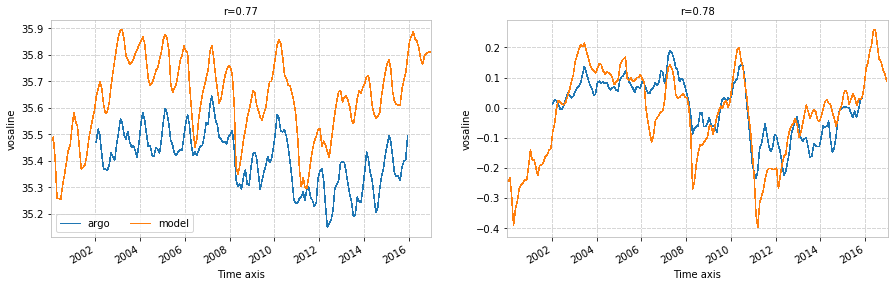

In [5]:
# June 12, SOME VALIDATION
fig,ax = plt.subplots(ncols=2,figsize=(15,4))
nni_argo['PSAL'][:,3].plot(ax=ax[0],label='argo')  # 10m
# nni_argo['PSAL'][:,0].plot()
k003f['vosaline'][:,0].plot(ax=ax[0],label='model')
ax[0].set_xlim('2000-01-02','2017-01-01')
ax[0].legend(ncol=2)
ax[0].set_title('r=' + str(np.round(crosscor(nni_argo['PSAL'][:,3],
                                    k003f['vosaline'][:,0].sel(time_counter=slice('2002-01-01','2015-12-31')))[0],2)))

# anomaly
deseason(nni_argo['PSAL'][:,3],timevar='time').plot(ax=ax[1])  # 10m
# nni_argo['PSAL'][:,0].plot()
deseason(k003f['vosaline'][:,0],refperiod=['2002-01-01','2015-12-31']).plot(ax=ax[1])
plt.xlim('2000-01-02','2017-01-01')
ax[1].set_title('r=' + str(np.round(crosscor(deseason(nni_argo['PSAL'][:,3],timevar='time'),
                                    deseason(k003f['vosaline'][:,0].sel(time_counter=slice('2002-01-01','2015-12-31'))))[0],2)))

- There is an over all salinity bias in the model, which is likely due to too high salinities in west pacific waters. (Patrick mentionend that at some point)
- anomalies compare fairly well though.

## OISST

In [6]:
# OISST data
# oisst = xr.open_dataset('/vortex/clidex/data/obs/OISST/OISSTv2/oisst_EIO.nc',chunks={})
# nni_oisst = oisst.sel(lon=slice(110,118),lat=slice(-32,-22)).mean(['lat','lon']).load()
# nni_oisst.to_netcdf('../data/nni_oisst.nc')
nni_oisst = xr.open_dataset('../data/nni_oisst.nc')

# remove seasonal cycle
nni_oisst_a = (nni_oisst.groupby('time.month')-nni_oisst.groupby('time.month').mean('time'))

# resample to monthly mean
nni_oisstmm = nni_oisst_a.resample(time='1M').mean()

### Some correlation for validation

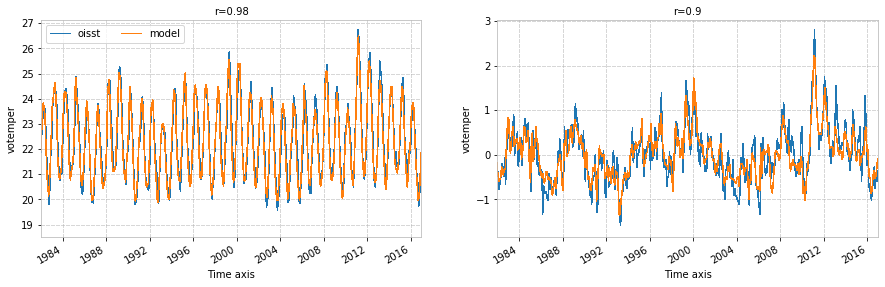

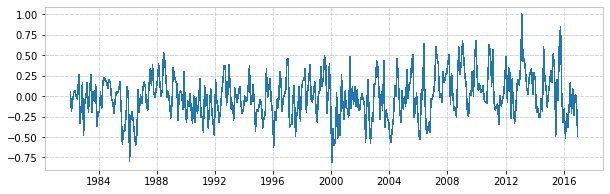

In [7]:
# June 12, SOME VALIDATION

# full temperature
fig,ax = plt.subplots(ncols=2,figsize=(15,4))
nni_oisst['sst'].resample(time='1M').mean().plot(ax=ax[0],label='oisst')  # 10m
# nni_argo['PSAL'][:,0].plot()
k003f['votemper'][:,0].plot(ax=ax[0],label='model')
ax[0].set_xlim('1982-01-01','2016-12-31')
ax[0].legend(ncol=2)
ax[0].set_title('r=' + str(np.round(crosscor(nni_oisst['sst'].resample(time='1M').mean().sel(time=slice('1982-01-01','2016-12-31')),
                                    k003f['votemper'][:,0].sel(time_counter=slice('1982-01-01','2016-12-31')))[0],2)))

# anomaly
oisst_dseas = deseason(nni_oisst['sst'].resample(time='1M').mean().sel(time=slice('1982-01-01','2016-12-31')),
                                                                    timevar='time',refperiod=['1982-01-01','2016-12-31'])
oisst_dseas.plot(ax=ax[1])  # 10m
# nni_argo['PSAL'][:,0].plot()
deseason(k003f['votemper'][:,0],refperiod=['1982-01-01','2016-12-31']).plot(ax=ax[1])
plt.xlim('1982-01-01','2016-12-31')
ax[1].set_title('r=' + str(np.round(crosscor(oisst_dseas,
                                    deseason(k003f['votemper'][:,0].sel(time_counter=slice('1982-01-01','2016-12-31'))))[0],2)))

# plot differences
plt.figure(figsize=(10,3))
plt.plot(k003f['time_counter'].sel(time_counter=slice('1982-01-01','2016-12-31')),
         deseason(nni_oisst['sst'].resample(time='1M').mean().sel(time=slice('1982-01-01','2016-12-31')),timevar='time').values-
         deseason(k003f['votemper'][:,0].sel(time_counter=slice('1982-01-01','2016-12-31'))).values)

## ITF

In [8]:
# ITF data
# run = 'K003.hindcast'
# itf = xr.open_dataset('/vortex/clidex/data/ORCA/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-' +
#                      run + '/ORCA025.L46.LIM2vp.CFCSF6.JRA.XIOS2-' + run + '_1m_19580101_20161231_ITF.nc')
# itf["itf_dseas"] = deseason_month(itf)['ITF']
# from scipy import signal
# itf["itf_detr"] = (['time_counter'],signal.detrend(itf['itf_dseas']))
# itf.to_netcdf('../data/k003_itf.nc')

itf = xr.open_dataset('../data/k003_itf.nc')

## Climate Indices

In [9]:
indices = xr.open_dataset('/vortex/clidex/data/obs/climate_indices/indices_noaa_psl_May_13_2020.nc')

# Detect events

I am using a seasonally varying threshold at the 90th percentile threshold

In [10]:
###########################
# seasonal,monthly threshold

# define threshold
pval = 10
bool_mhw,bool_mcw = detect_events(k003,pval,0,'monthly')

calculate monthly threshold


# Plotting

## Figure 3: NNI temp & sal

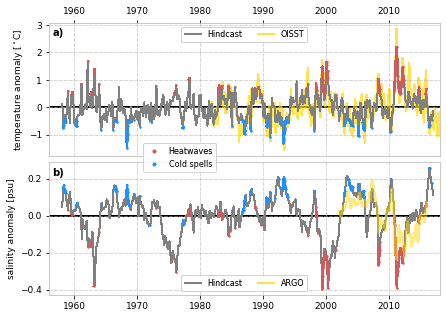

In [11]:
# plot NNI and seasonal and constant threshold
plt.rcParams.update({'font.size':9})
fig,ax = plt.subplots(nrows=2,sharex=False,figsize=(7,5))
plt.subplots_adjust(hspace=0.05)

#deseason_month(LC_k003['votemper']).mean('lat')[:,0].plot(color='darkgray')
for var,i in zip(['votemper','vosaline'],range(2)):
    k003[var][:,0].plot(ax=ax[i],color='gray',linewidth=1)

    # add detected events
    (k003[var][:,0]*bool_mhw).plot(ax=ax[i],marker='.',linestyle='',markersize=3,label='mhw',color='indianred')
    (k003[var][:,0]*bool_mcw).plot(ax=ax[i],marker='.',linestyle='',markersize=3,label='mcw',color='dodgerblue')
    (k003[var][:,0]*bool_mcw).plot(ax=ax[i],color='dodgerblue',linewidth=1.5)
    (k003[var][:,0]*bool_mhw).plot(ax=ax[i],color='indianred',linewidth=1.5)
    ax[i].set_title("")
#
    ax[i].axhline(0,color='k',zorder=0,linewidth=1.5)
# add oisst
nni_oisstmm['sst'].plot(ax=ax[0],zorder=0,color='gold',linewidth=1.5,alpha=0.7)
# add argo sal
nni_argo_a['PSAL'][:,3].plot(ax=ax[1],zorder=10,color='gold',linewidth=1.5, alpha=0.5)
ax[1].set_title('')

#
ax[0].set_ylabel('temperature anomaly [$^\circ$C]')
ax[1].set_ylabel('salinity anomaly [psu]')
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=0,horizontalalignment='center');
ax[0].xaxis.tick_top()
ax[0].xaxis.set_label_position('top') 
ax[0].set_xlim('1956-01-01','2018-01-01')
ax[1].set_xlim('1956-01-01','2018-01-01')

# two legends
lines = ax[0].get_lines()
lg1 = fig.legend([lines[i] for i in [1,2]],
                       ["Heatwaves","Cold spells"], loc = (0.32, 0.46),fontsize=8,markerscale=2)
lg2 = ax[0].legend([lines[i] for i in [0,6]],
                       ["Hindcast",'OISST'], loc='upper center',fontsize=8,ncol=2)
lg3 = ax[1].legend([lines[i] for i in [0,6]],
                       ["Hindcast",'ARGO'], loc='lower center',fontsize=8,ncol=2)
# set the linewidth of each legend object
for legobj in lg2.legendHandles:
    legobj.set_linewidth(2.0)
for legobj in lg3.legendHandles:
    legobj.set_linewidth(2.0)
# add legends    
ax[0].add_artist(lg1)
ax[0].add_artist(lg2)
ax[1].add_artist(lg3)

# add panel labels
for ax,i in zip(ax,range(2)) :
    ax.text(0.008, 0.9, string.ascii_lowercase[i]+')', transform=ax.transAxes, 
                size=10, weight='bold')
    ax.set_xlabel('')

#
# plt.savefig(plotsave + 'Fig3_NNI_timeseries_temp_sal_oisst_argo_rev1.png',dpi=300,bbox_inches='tight')

- the big salinity signals only occur in negative IPO phase

In [12]:
# correlations 

# temp anomalies (diff. ref. periods)
print('temp anomalies NNI: ' + str(crosscor(nni_oisstmm['sst'].sel(time=slice(None,'2017-01-01')),
               k003['votemper'].sel(time_counter=slice('1981-09-01',None))[:,0])))

# temp anomalies (same ref. periods)
print('temp anomalies NNI (same ref. period): ' + str(crosscor(deseason(nni_oisst['sst'].resample(time='1M').mean().sel(time=slice(None,'2017-01-01')),timevar='time'),
               deseason(k003f['votemper'].sel(time_counter=slice('1981-09-01',None))[:,0]))))

# temp full fields
print('temp full NNI: ' + str(crosscor(nni_oisst['sst'].resample(time='1M').mean().sel(time=slice(None,'2016-12-31')),
                                    k003f['votemper'][:,0].sel(time_counter=slice('1981-09-01','2016-12-31')))))

# sal full fields
print('sal full NNI (same ref. period) : ' + str(crosscor(nni_argo['PSAL'][:,0],
                                    k003f['vosaline'][:,0].sel(time_counter=slice('2002-01-01','2016-01-01')))))

# sal anomaly fields
print('sal anomaly NNI: ' + str(crosscor(deseason(nni_argo['PSAL'][:,0],timevar='time'),
                                    deseason(k003f['vosaline'][:,0].sel(time_counter=slice('2002-01-01','2016-01-01'))))))

temp anomalies NNI: (0.8869274680074672, 1.212164055731713e-143)
temp anomalies NNI (same ref. period): (0.8953404997625363, 2.524003718542076e-150)
temp full NNI: (0.9821197756463215, 3.482792359149889e-308)
sal full NNI (same ref. period) : (0.7621885659016057, 3.605688974120231e-33)
sal anomaly NNI: (0.7726433704582332, 1.392615016500306e-34)


## Fig 11: NNI plus ONI, ITF

### NNI - IPO/Nino

In [13]:
# add ipo phase as bar
# Create rectangle x coordinates
def add_ipo_bar(ax):
    cols = ['dodgerblue','indianred','dodgerblue','indianred']
    text = ['-IPO','+IPO','-IPO','']
    years = [1956,1977,1999,2013,2020]
    for i in range(len(years)-1):
        startTime = indices.sel(Month=slice(str(years[i]) + '-01-01',str(years[i]) + '-01-31'))['Month'].values
        endTime =  indices.sel(Month=slice(str(years[i+1]-1) + '-12-01',str(years[i+1]-1) + '-12-31'))['Month'].values#startTime + timedelta(seconds = 1)
        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start
        middle = (width/2)+start
        
        ulim = ax.get_ybound()[1]
        llim = ax.get_ybound()[1] - ax.get_ybound()[1]/6 
        rect = Rectangle((start[0], llim), width, ulim, color=cols[i],alpha=0.5)
        ax.text(middle,(ulim-llim)/2+llim,text[i],fontsize=6,fontweight='bold',verticalalignment='center',
               horizontalalignment='center')
        ax.add_patch(rect)


# function to plot panels
def plot_panel(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34'):
    
    anomaly(ax3,ds.time_counter.values,signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht')),[0,0])
    ax3.set_xlim('1956-01-01','2018-01-01')
    ax3.set_ylim(ylim1)
    ticks = calculate_ticks(ax3, 5,axis = 'y', round_to=round1, center=True)
    ax3.set_yticks(ticks)
    
    ax32 = ax3.twinx()
    ax32.plot(indices['Month'].values,indices[index].rolling(Month=8,center=True).mean(),color='gray',alpha=0.8)
    ax32.set_ylim(ylim2)
    cor = stats.pearsonr(signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht').rolling(time_counter=12,center=True).mean().dropna(dim='time_counter')),
                indices[index].sel(Month=slice('1958-01-01','2016-12-31')).rolling(Month=12,center=True).mean().dropna(dim='Month')) 
#     if cor[0]<=0: ax32.invert_yaxis()
    ax32.invert_yaxis()
    ticks = calculate_ticks(ax32, 5,axis = 'y', round_to=round2, center=True)
    ax32.set_yticks(ticks)
    ax32.set_ylabel(index)
    # show correlation as text
    ax3.text(0.03, 0.83,'r='+str(np.round(cor[0],2)), transform=ax3.transAxes, 
                    size=8, weight='bold')
    ax32.spines['right'].set_color('gray')
    ax32.yaxis.label.set_color('gray')
    ax32.tick_params(axis='y', colors='gray')
#     ax32.set_xticklabels('')

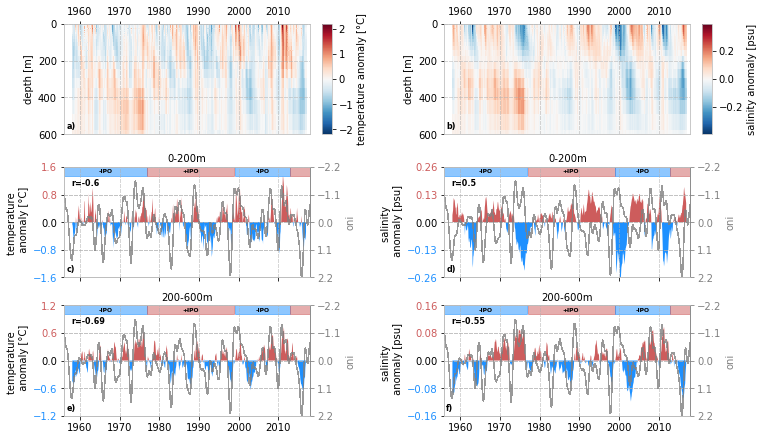

In [14]:
########## Figure 12 ###############

plt.rcParams.update({'font.size':10})
# plotting
fig2 = plt.figure(figsize=(10.5,6),constrained_layout=True)
widths = [0.5,0.5]
heights = [1,1,1]
grid = fig2.add_gridspec(ncols=2, nrows=3, width_ratios=widths,
                          height_ratios=heights,hspace=0.02)

# temperature
ax1 = fig2.add_subplot(grid[0, 0])
k003['votemper'].plot(ax=ax1,y='deptht',yincrease=False,cbar_kwargs={"label": 'temperature anomaly [\N{DEGREE SIGN}C]'})
# anomaly(ax1)
ax1.xaxis.tick_top()    
ax1.xaxis.set_label_position('top') 

# salinity
ax2 = fig2.add_subplot(grid[0, 1])
k003['vosaline'].plot(ax=ax2,y='deptht',yincrease=False,cbar_kwargs={"label": 'salinity anomaly [psu]'})
ax2.xaxis.tick_top()    
ax2.xaxis.set_label_position('top') 

# axis properties Hovmoeller
for ax in [ax1,ax2]:
    ax.grid()
    ax.set_ylim(600,0)
    ax.set_ylabel('depth [m]')
    ax.set_xlim('1956-01-01','2018-01-01')
    ax.set_xlabel('')
# ax2.set_xticklabels('')
# ylim for index
ylim2 = [-2,2]
index = 'oni'

# temp 200
ax3 = fig2.add_subplot(grid[1, 0])
ax3.set_title('0-200m',fontsize=10)
plot_panel(ax3,k003,'votemper',[0,200],indices,ylim1=[-1.4,1.4],ylim2=ylim2,round1=0.1,round2=0.1,index=index)
# ax3.set_xticklabels('')

# sal 200
ax4 = fig2.add_subplot(grid[1, 1],sharex=ax3)
ax4.set_title('0-200m')
plot_panel(ax4,k003,'vosaline',[0,200],indices,ylim1=[-0.25,0.25],ylim2=ylim2,round1=0.01,round2=0.1,index=index)

# temp 200-600
ax5 = fig2.add_subplot(grid[2, 0])
ax5.set_title('200-600m')
plot_panel(ax5,k003,'votemper',[200,600],indices,ylim1=[-1,1],ylim2=ylim2,round1=0.1,round2=0.1,index=index)

# sal 200-600
ax6 = fig2.add_subplot(grid[2, 1])
ax6.set_title('200-600m')
plot_panel(ax6,k003,'vosaline',[200,600],indices,ylim1=[-0.15,0.15],ylim2=ylim2,round1=0.01,round2=0.1,index=index)
# plot_panel(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34')

# ax3.spines['right'].set_visible(False)
# ax3.yaxis.grid() # vertical lines
# ax3.invert_yaxis()
# ax3.set_ylabel('IPO index')
ax4.set_xticklabels('')
for ax in [ax3,ax5]: ax.set_ylabel('temperature \n  anomaly [\N{DEGREE SIGN}C]')
for ax in [ax4,ax6]: ax.set_ylabel('salinity \n anomaly [psu]')
# color labels
for ax in [ax3,ax4,ax5,ax6]:
    colors=['indianred','dodgerblue']
    for i,tick in zip(range(len(ax.yaxis.get_major_ticks())),ax.yaxis.get_major_ticks()):
        if i < int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[1]) #set the color property
        elif i > int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[0]) #set the color property
            
    # add ipo phase as bar
    add_ipo_bar(ax); 
    
# add panel labels
for ax,i in zip([ax1,ax2,ax3,ax4,ax5,ax6],range(6)) :
    ax.text(0.008, 0.05, string.ascii_lowercase[i]+')', transform=ax.transAxes, 
                size=8, weight='bold')
    
# save figure    
# finished_plot(fig2,'/climodes/data4/sryan/plots_rev/main_figs/Fig11_NNI_2layers_'+index+'.png')

### NNI - ITF (not used in paper)

In [15]:
def plot_panel_itf(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34'):
    
    anomaly(ax3,ds.time_counter.values,signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht')),[0,0])
    ax3.set_xlim('1956-01-01','2018-01-01')
    ax3.set_ylim(ylim1)
    ticks = calculate_ticks(ax3, 5,axis = 'y', round_to=round1, center=True)
    ax3.set_yticks(ticks)
    
    ax32 = ax3.twinx()
    ax32.plot(indices.time_counter.values,indices[index].rolling(time_counter=12,center=True).mean()/1e06,color='gray',alpha=0.8)
    ax32.set_ylim(ylim2)
    cor = stats.pearsonr(signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht').rolling(time_counter=12,center=True).mean().dropna(dim='time_counter')),
                indices[index].sel(time_counter=slice('1958-01-01','2016-12-31')).rolling(time_counter=12,center=True).mean().dropna(dim='time_counter')) 
    if cor[0]<=0: ax32.invert_yaxis()
    ticks = calculate_ticks(ax32, 5,axis = 'y', round_to=round2, center=True)
    ax32.set_yticks(ticks)
    ax32.set_ylabel(index)
    # show correlation as text
    ax3.text(0.03, 0.83,np.round(cor[0],2), transform=ax3.transAxes, 
                    size=8, weight='bold')
    ax32.spines['right'].set_color('gray')
    ax32.yaxis.label.set_color('gray')
    ax32.tick_params(axis='y', colors='gray')
#     ax32.set_xticklabels('')

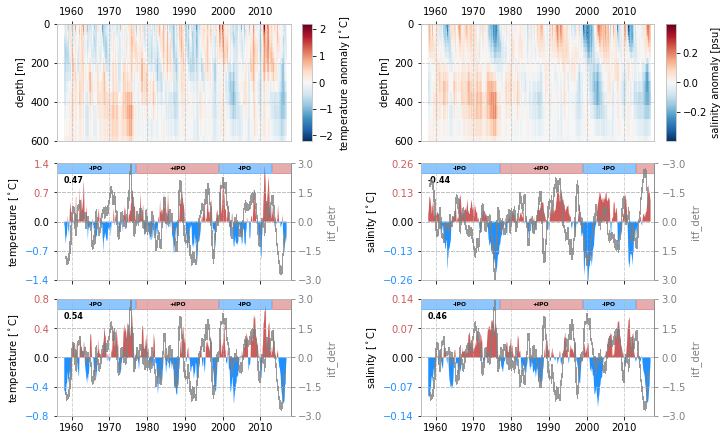

In [16]:
##############################
layer = 'upper'
var1 = 'vosaline' # for IPO
var2 = 'votemper' # for ITF
itf_detr = 0      # 1 for yes, 0 for no --> all deseasoned
##################################

plt.rcParams.update({'font.size':10})
# plotting
fig2 = plt.figure(figsize=(10,6),constrained_layout=True)
widths = [0.5,0.5]
heights = [1,1,1]
grid = fig2.add_gridspec(ncols=2, nrows=3, width_ratios=widths,
                          height_ratios=heights,hspace=0.02)

# temperature
ax1 = fig2.add_subplot(grid[0, 0])
k003['votemper'].plot(ax=ax1,y='deptht',yincrease=False,cbar_kwargs={"label": 'temperature anomaly [$^\circ$C]'})
# anomaly(ax1)
ax1.xaxis.tick_top()    
ax1.xaxis.set_label_position('top') 

# salinity
ax2 = fig2.add_subplot(grid[0, 1])
k003['vosaline'].plot(ax=ax2,y='deptht',yincrease=False,cbar_kwargs={"label": 'salinity anomaly [psu]'})
ax2.xaxis.tick_top()    
ax2.xaxis.set_label_position('top') 

# axis properties Hovmoeller
for ax in [ax1,ax2]:
    ax.grid()
    ax.set_ylim(600,0)
    ax.set_ylabel('depth [m]')
    ax.set_xlim('1956-01-01','2018-01-01')
    ax.set_xlabel('')
# ax2.set_xticklabels('')
# ylim for index
ylim2 = [-2.8,2.8]
index = 'itf_detr'

# temp 200
ax3 = fig2.add_subplot(grid[1, 0])
plot_panel_itf(ax3,k003,'votemper',[0,200],itf,ylim1=[-1.2,1.2],ylim2=ylim2,round1=0.1,round2=0.1,index=index)
# ax3.set_xticklabels('')

# sal 200
ax4 = fig2.add_subplot(grid[1, 1],sharex=ax3)
plot_panel_itf(ax4,k003,'vosaline',[0,200],itf,ylim1=[-0.25,0.25],ylim2=ylim2,round1=0.01,round2=0.1,index=index)

# temp 200-600
ax5 = fig2.add_subplot(grid[2, 0])
plot_panel_itf(ax5,k003,'votemper',[200,600],itf,ylim1=[-0.6,0.6],ylim2=ylim2,round1=0.1,round2=0.1,index=index)

# sal 200-600
ax6 = fig2.add_subplot(grid[2, 1])
plot_panel_itf(ax6,k003,'vosaline',[200,600],itf,ylim1=[-0.13,0.13],ylim2=ylim2,round1=0.01,round2=0.1,index=index)
# plot_panel(ax3,ds,var,depthr,indices,ylim1,ylim2,round1=0.1,round2=0.1,index='nino34')

# ax3.spines['right'].set_visible(False)
# ax3.yaxis.grid() # vertical lines
# ax3.invert_yaxis()
# ax3.set_ylabel('IPO index')
ax4.set_xticklabels('')
for ax in [ax3,ax5]: ax.set_ylabel('temperature [$^\circ$C]')
for ax in [ax4,ax6]: ax.set_ylabel('salinity [$^\circ$C]')
# color labels
for ax in [ax3,ax4,ax5,ax6]:
    colors=['indianred','dodgerblue']
    for i,tick in zip(range(len(ax.yaxis.get_major_ticks())),ax.yaxis.get_major_ticks()):
        if i < int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[1]) #set the color property
        elif i > int(len(ax.yaxis.get_major_ticks())/2):
            tick.label1.set_color(colors[0]) #set the color property
    # add ipo phase as bar
    add_ipo_bar(ax);
            

## Correlations

### Table with correlations

12 month LP Filter

(-0.5273664540223618, 3.7552058083881323e-51)
       Name   temp_up     talpha_up   temp_lo      talpha_lo    sal_up  \
0       ITF  0.211913  1.614761e-08  0.650521   4.255585e-85 -0.346101   
1  ITF_detr  0.449540  5.692246e-36  0.495391   1.941289e-44 -0.443151   
2       IPO -0.587057  8.684989e-66 -0.661964   4.363568e-89  0.564171   
3       ONI -0.539660  6.269291e-54 -0.695645  6.400113e-102  0.499859   

      salpha_up    sal_lo     salpha_lo  
0  4.803928e-21  0.665800  1.831866e-90  
1  6.859596e-35  0.357584  1.887437e-22  
2  8.019799e-60 -0.422789  1.355262e-31  
3  2.467069e-45 -0.520185  1.397134e-49  


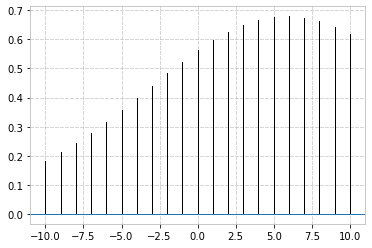

In [17]:
####################
# correlations

# import scipy.stats as stats
# def crosscor(dummy,dummy2):
#     test=stats.pearsonr(signal.detrend(dummy.values[~np.isnan(dummy2.values)]),dummy2.values[~np.isnan(dummy2.values)])
#     return test[0],test[1]
# stats.pearsonr(signal.detrend(ds[var].sel(deptht=slice(*depthr)).mean('deptht').rolling(time_counter=12,center=True).mean().dropna(dim='time_counter')),
#                 indices[index].sel(Month=slice('1958-01-01','2016-12-31')).rolling(Month=12,center=True).mean().dropna(dim='Month')) 

layer='upper'
if layer=='upper': depth=[0,200]
elif layer=='lower': depth=[200,600]

# define list
num = 4 
temp_up = np.empty(num)
temp_lo = np.empty(num)
talpha_up = np.empty(num)
talpha_lo = np.empty(num)
sal_up = np.empty(num)
sal_lo = np.empty(num)
salpha_up = np.empty(num)
salpha_lo = np.empty(num)

for ds in [k003]:
    itf1 = (itf['itf_dseas']/1e06).rolling(time_counter=12,center=True).mean()
    itf2 = (itf['itf_detr']/1e06).rolling(time_counter=12,center=True).mean()
    oni = indices['nino34'].sel(Month=slice('1958-01-01','2016-12-31')).rolling(Month=12,center=True).mean()
    ipo = indices['ipo'].sel(Month=slice('1958-01-01','2016-12-31')).rolling(Month=12,center=True).mean()
#     ipo = data['ipo'][(data['time']<2017) & (data['time']>=1958)]
    var = 'votemper'
    dummy = ds[var].sel(deptht=slice(0,200)).mean('deptht').rolling(time_counter=12,center=True).mean()
    temp_up[0],talpha_up[0] = crosscor(dummy,itf1)
    temp_up[1],talpha_up[1] = crosscor(dummy,itf2)
    temp_up[2],talpha_up[2] = crosscor(dummy,ipo)
    temp_up[3],talpha_up[3] = crosscor(dummy,oni)
    dummy = ds[var].sel(deptht=slice(200,600)).mean('deptht').rolling(time_counter=12,center=True).mean()
    temp_lo[0],talpha_lo[0] = crosscor(dummy,itf1)
    temp_lo[1],talpha_lo[1] = crosscor(dummy,itf2)
    temp_lo[2],talpha_lo[2] = crosscor(dummy,ipo)
    temp_lo[3],talpha_lo[3] = crosscor(dummy,oni)


    var = 'vosaline'
    dummy = ds[var].sel(deptht=slice(0,200)).mean('deptht').rolling(time_counter=12,center=True).mean()
    sal_up[0],salpha_up[0] = crosscor(dummy,itf1)
    sal_up[1],salpha_up[1] = crosscor(dummy,itf2)
    sal_up[2],salpha_up[2] = crosscor(dummy,ipo)
    sal_up[3],salpha_up[3] = crosscor(dummy,oni)
    test =plt.xcorr(dummy[~np.isnan(itf2.values)],ipo.values[~np.isnan(ipo.values)])

    dummy = ds[var].sel(deptht=slice(200,600)).mean('deptht').rolling(time_counter=12,center=True).mean()
    sal_lo[0],salpha_lo[0] = crosscor(dummy,itf1)
    sal_lo[1],salpha_lo[1] = crosscor(dummy,itf2)
    sal_lo[2],salpha_lo[2] = crosscor(dummy,ipo)
    sal_lo[3],salpha_lo[3] = crosscor(dummy,oni)

    dummy = crosscor(ipo,itf1)
    print(dummy)

    cor = {'Name':['ITF','ITF_detr','IPO','ONI'], 'temp_up':temp_up,'talpha_up':talpha_up, 'temp_lo':temp_lo,'talpha_lo':talpha_lo,
          'sal_up':sal_up,'salpha_up':salpha_up, 'sal_lo':sal_lo,'salpha_lo':salpha_lo} 

    cor = pd.DataFrame(cor)
    print(cor)